In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('employee_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values and data types
print(df.info())


   Unnamed: 0  id groups  age  healthy_eating  active_lifestyle  salary
0           0   0      A   36               5                 5    2297
1           1   1      A   55               3                 5    1134
2           2   2      A   61               8                 1    4969
3           3   3      O   29               3                 6     902
4           4   4      O   34               6                 2    3574
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   id                1000 non-null   int64 
 2   groups            1000 non-null   object
 3   age               1000 non-null   int64 
 4   healthy_eating    1000 non-null   int64 
 5   active_lifestyle  1000 non-null   int64 
 6   salary            1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ K

In [2]:
# Drop unnecessary columns
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['groups'], drop_first=True)

# Handle missing values (not needed here, but included for completeness)
df.fillna(df.mean(), inplace=True)


In [3]:
# Descriptive statistics
print(df.describe())


               age  healthy_eating  active_lifestyle      salary
count  1000.000000     1000.000000       1000.000000  1000.00000
mean     41.155000        4.944000          5.683000  2227.46100
std      13.462995        2.013186          2.048587  1080.20976
min      18.000000        0.000000          0.000000   553.00000
25%      30.000000        4.000000          4.000000  1360.00000
50%      41.000000        5.000000          6.000000  2174.00000
75%      53.000000        6.000000          7.000000  2993.75000
max      64.000000       10.000000         10.000000  5550.00000


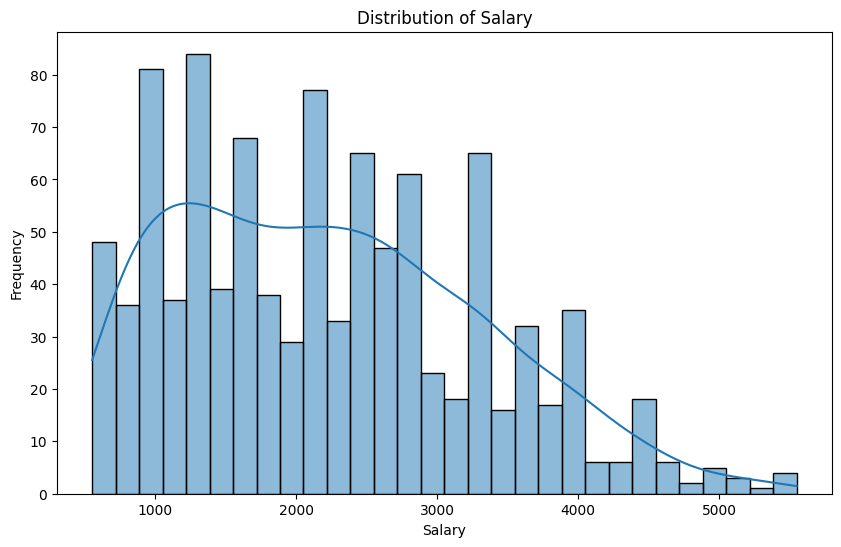

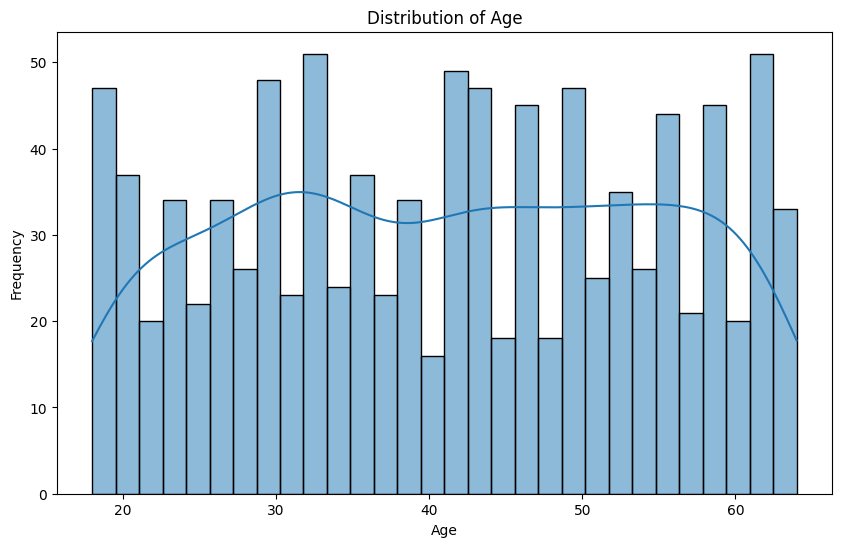

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable (salary)
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], kde=True, bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Extract features and target
X = df.drop('salary', axis=1).values
y = df['salary'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can print the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (800, 6), y_train shape: (800,)
X_test shape: (200, 6), y_test shape: (200,)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, you can print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 121428.5836049506
Coefficients: [ 1.52725822e-01  4.56916929e+02 -1.79287448e+02 -7.42293395e+00
  5.63794794e+01  4.10379028e+01]
Intercept: 967.7190554396775


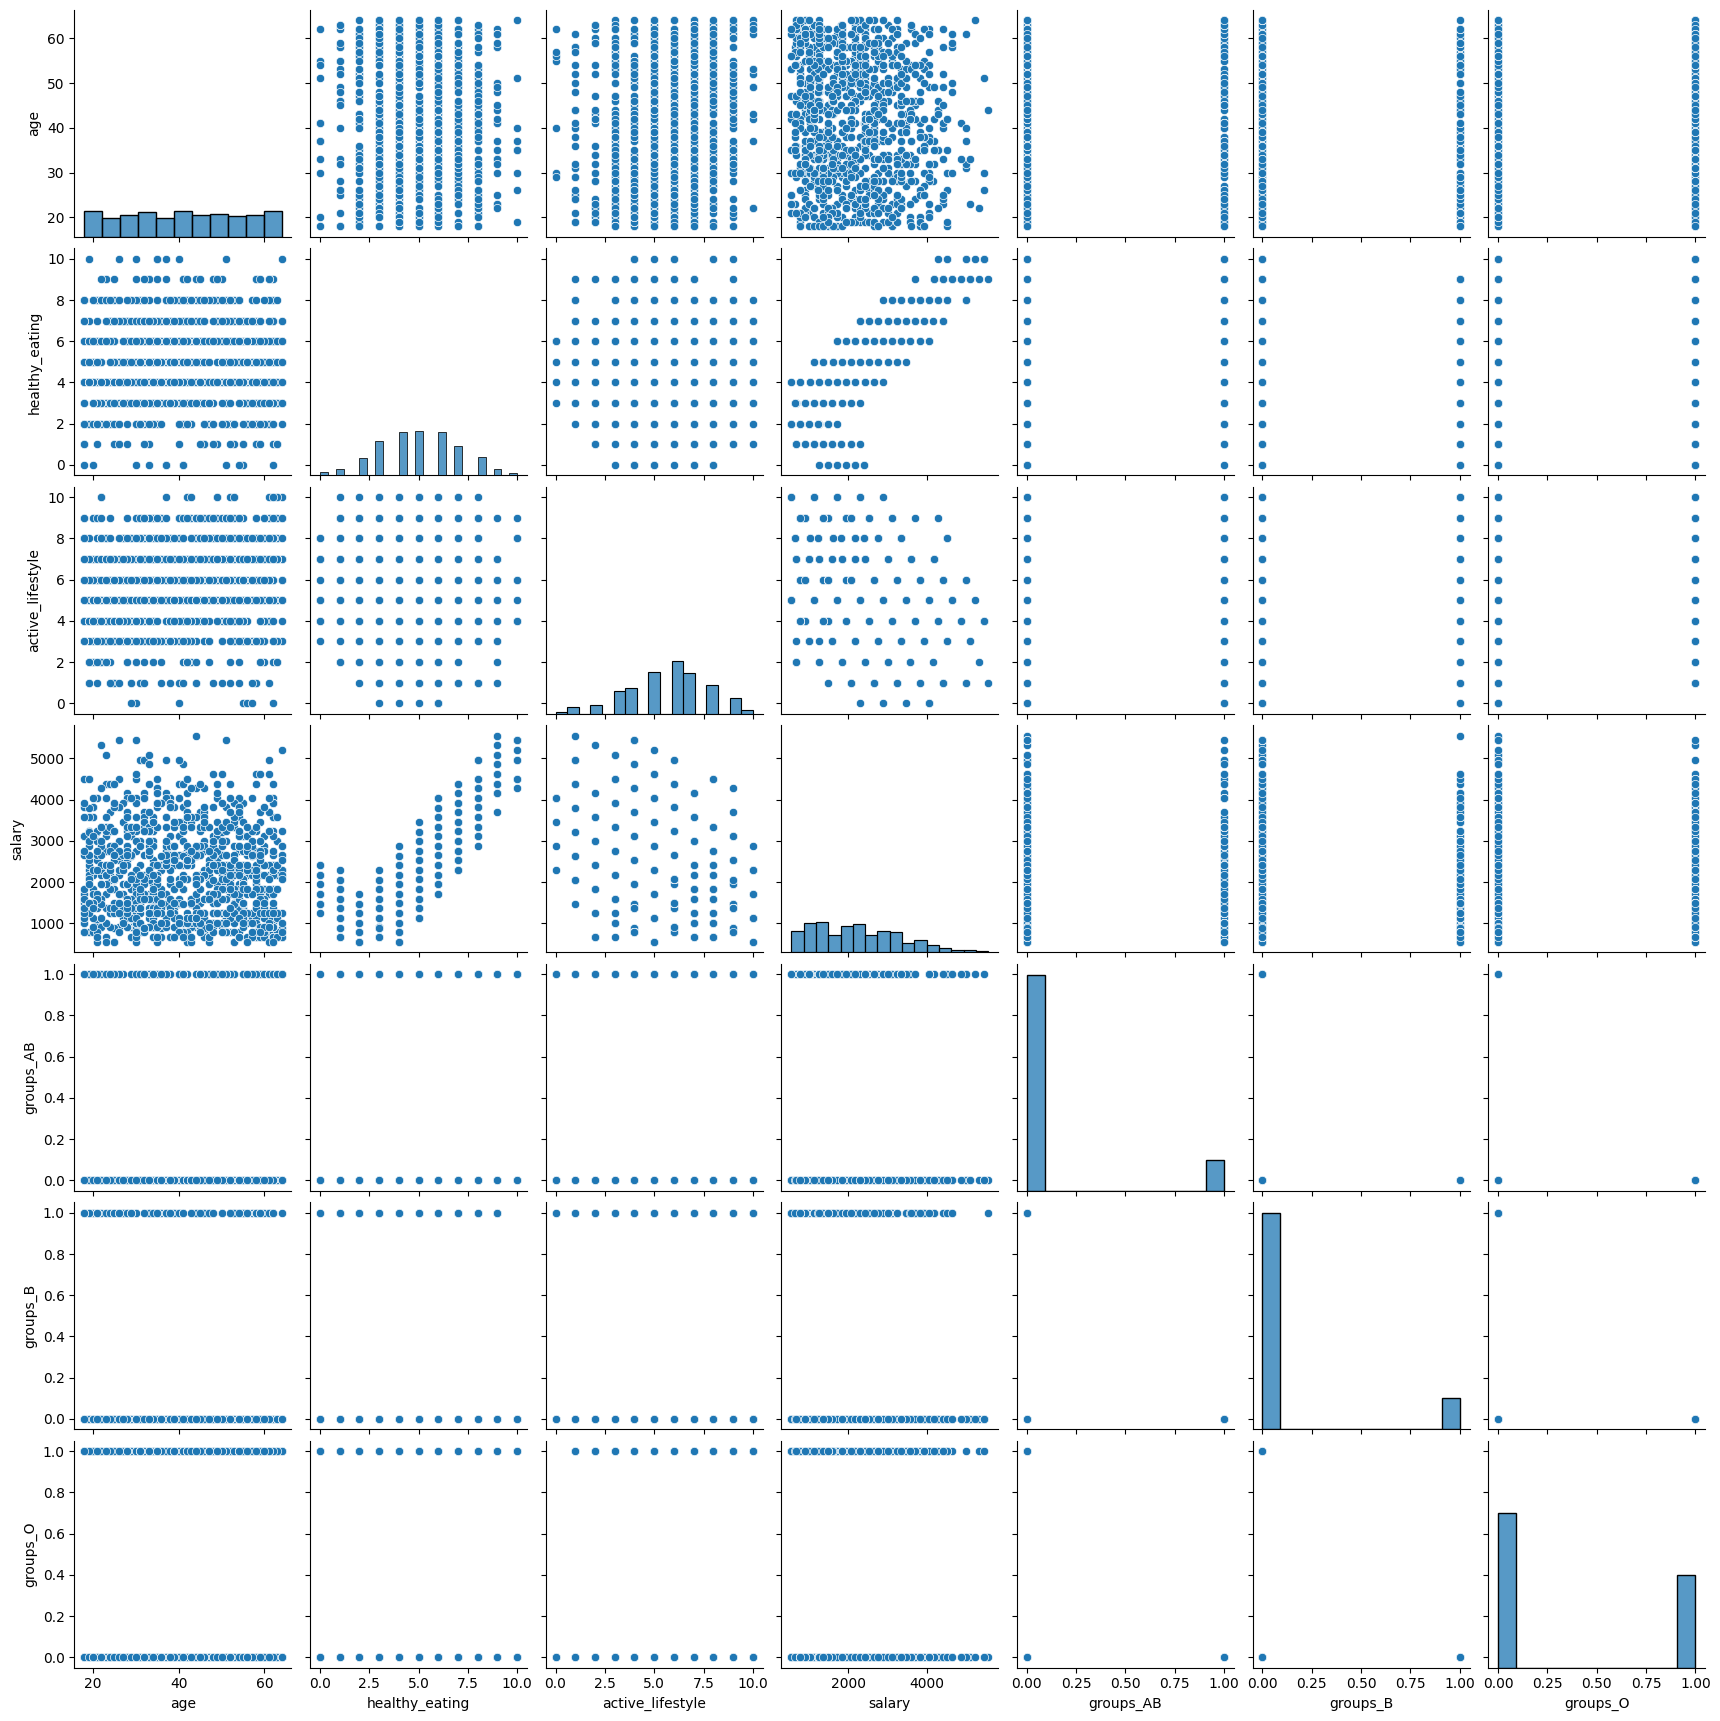

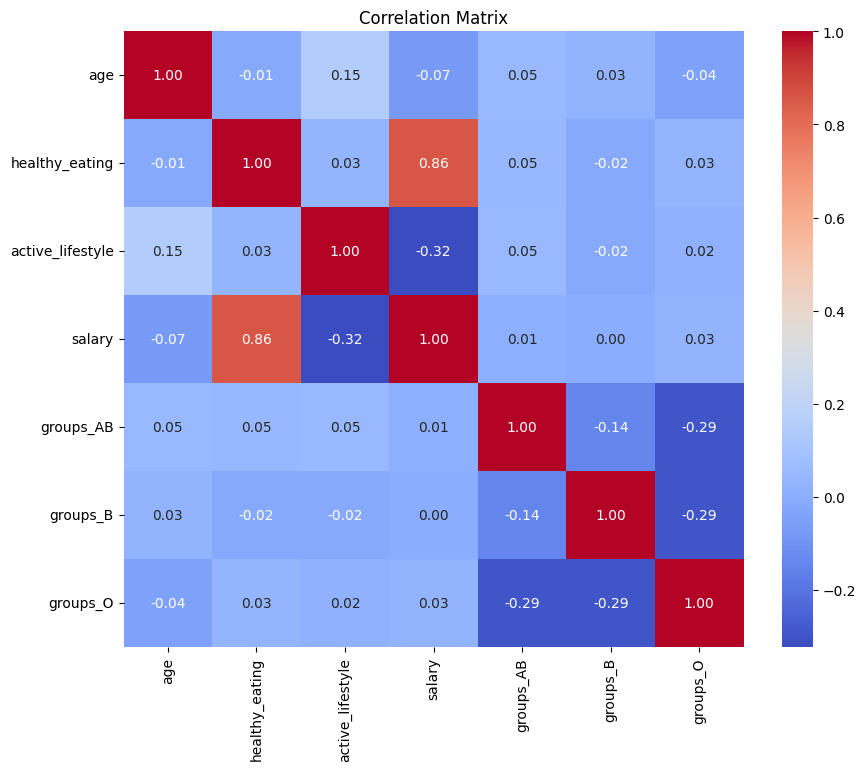

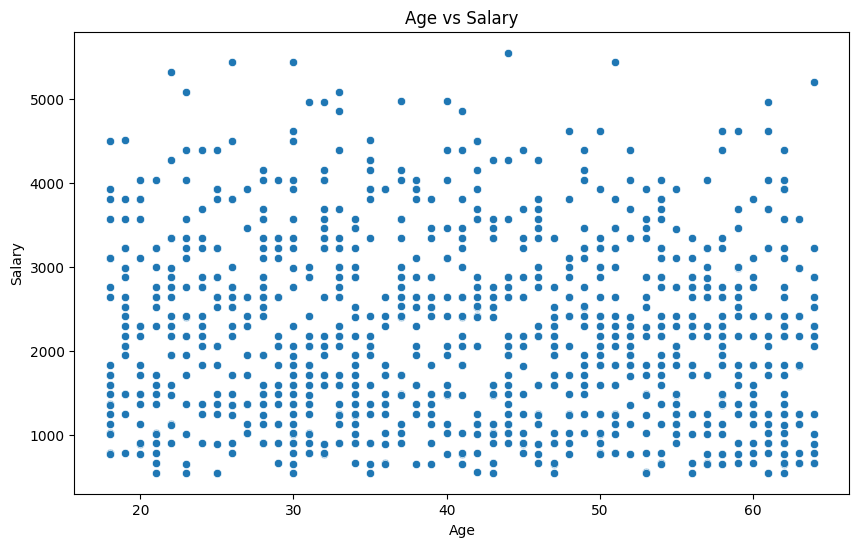

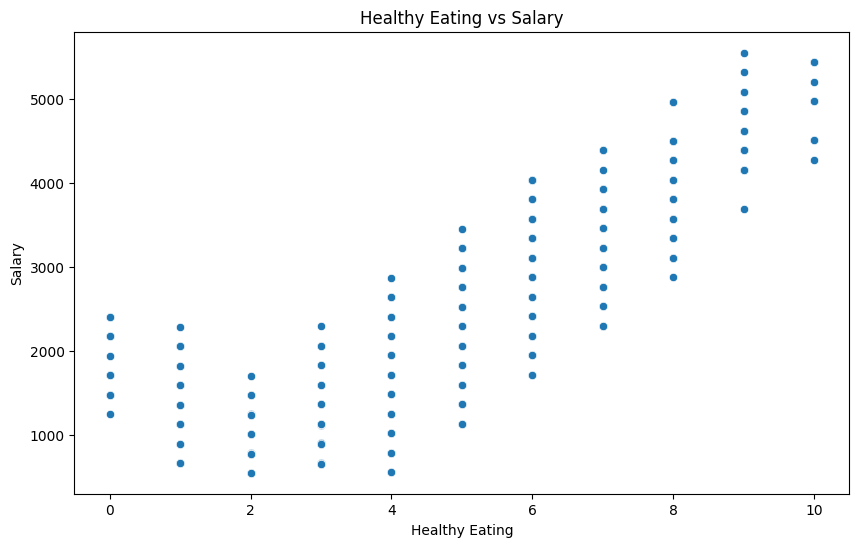

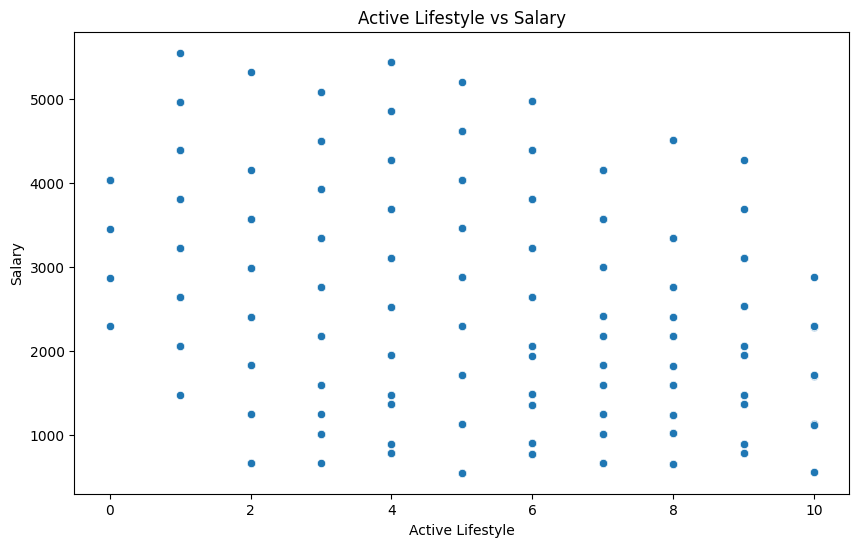

In [7]:
# Pairplot to visualize relationships between features and the target variable
sns.pairplot(df)
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for specific features vs. salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='salary', data=df)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='healthy_eating', y='salary', data=df)
plt.title('Healthy Eating vs Salary')
plt.xlabel('Healthy Eating')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='active_lifestyle', y='salary', data=df)
plt.title('Active Lifestyle vs Salary')
plt.xlabel('Active Lifestyle')
plt.ylabel('Salary')
plt.show()


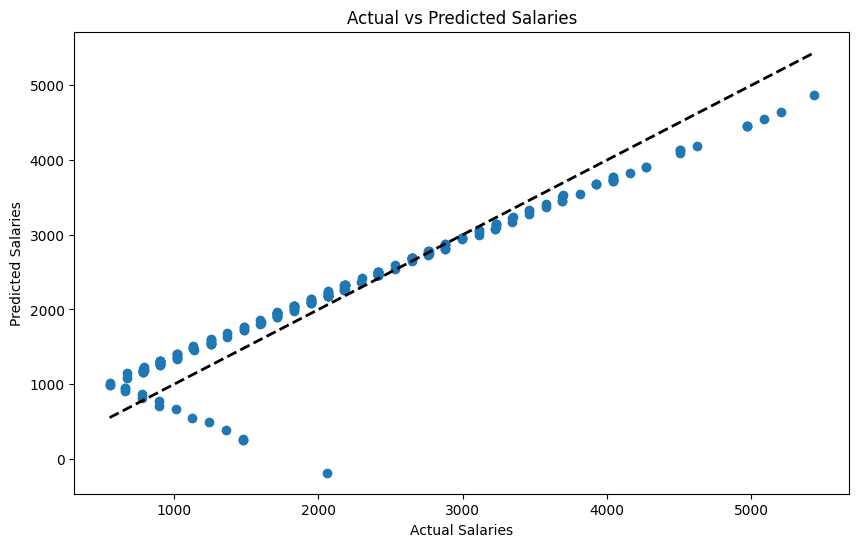

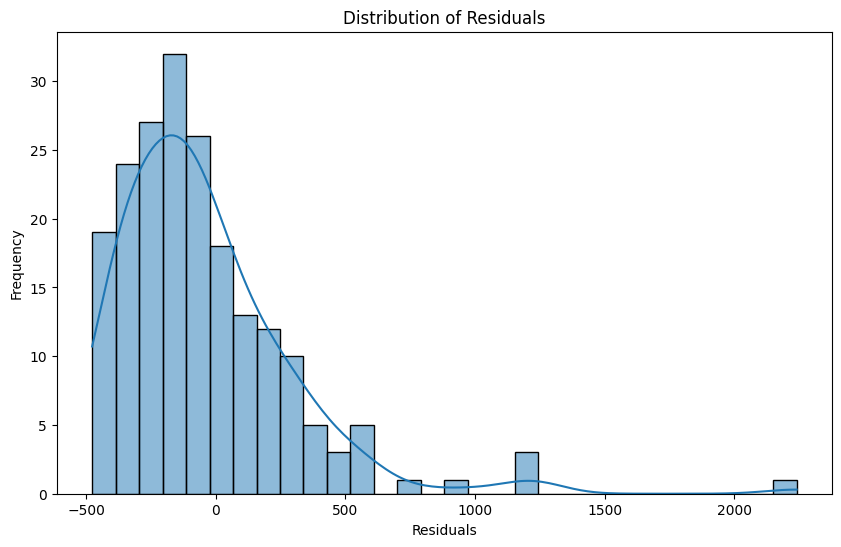

In [8]:
# Visualize the predictions vs the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.show()

# Distribution of the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
